# Regression of Used Car Prices

`Welcome to the 2024 Kaggle Playground Series!` We plan to continue in the spirit of previous playgrounds, providing interesting an approachable datasets for our community to practice their machine learning skills, and anticipate a competition each month.

`Your Goal:` The goal of this competition is to predict the price of used cars based on various attributes.

## 1. Problem definition

How well can we  predict the price of used cars based on various attributes.

## 2. Data

The data was downloaded from Kaggle competition : https://www.kaggle.com/competitions/playground-series-s4e9

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Used Car Price Prediction Dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

`Files`
* `train.csv` - the training dataset; price is the continuous target
* `test.csv` - the test dataset; your objective is to predict the value of price for each row
* `sample_submission.csv` - a sample submission file in the correct format

## 3. Evaluation

**Root Mean Squared Error (RMSE)**

Submissions are scored on the root mean squared error. RMSE is defined as:

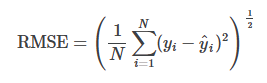

where  is the predicted value and  is the original value for each instance i

## 4. Features

* Brand & Model: Identify the brand or company name along with the specific model of each vehicle.

* Model Year: Discover the manufacturing year of the vehicles, crucial for assessing depreciation and technology advancements.

* Mileage: Obtain the mileage of each vehicle, a key indicator of wear and tear and potential maintenance requirements.

* Fuel Type: Learn about the type of fuel the vehicles run on, whether it's gasoline, diesel, electric, or hybrid.

* Engine Type: Understand the engine specifications, shedding light on performance and efficiency.

* Transmission: Determine the transmission type, whether automatic, manual, or another variant.

* Exterior & Interior Colors: Explore the aesthetic aspects of the vehicles, including exterior and interior color options.

* Accident History: Discover whether a vehicle has a prior history of accidents or damage, crucial for informed decision-making.

* Clean Title: Evaluate the availability of a clean title, which can impact the vehicle's resale value and legal status.

* Price: Access the listed prices for each vehicle, aiding in price comparison and budgeting.

### Preparing the tools

In [5]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install catboost lightgbm

Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor 
from catboost import CatBoostRegressor 
from lightgbm import LGBMRegressor

### Import the data

In [8]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

In [9]:
df_train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


### Explore and manipulate data

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [11]:
df_train.isna().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [12]:
df_train.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [13]:
df_train['accident']=df_train['accident'].map({'None reported': 0,'At least 1 accident or damage reported': 1})
df_test['accident']=df_test['accident'].map({'None reported': 0,'At least 1 accident or damage reported': 1})

In [14]:
df_train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,0.0,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,1.0,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,0.0,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,0.0,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,0.0,Yes,97500


In [15]:
df_train["engine"].value_counts()

355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel           3462
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel           2902
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel           2841
2.0L I4 16V GDI DOHC Turbo                             2680
375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel          2451
                                                       ... 
151.0HP 1.5L 4 Cylinder Engine Gas/Electric Hybrid        1
184.0HP 2.4L 4 Cylinder Engine Flex Fuel Capability       1
78.0HP 1.2L 3 Cylinder Engine Gasoline Fuel               1
139.0HP 1.6L 4 Cylinder Engine Plug-In Electric/Gas       1
313.0HP 2.0L 4 Cylinder Engine Plug-In Electric/Gas       1
Name: engine, Length: 1117, dtype: int64

In [16]:
len(df_train["fuel_type"].value_counts())

7

In [17]:
df_train["transmission"].value_counts()

A/T                                                   49904
8-Speed A/T                                           20645
Transmission w/Dual Shift Mode                        19255
6-Speed A/T                                           18044
6-Speed M/T                                           11998
7-Speed A/T                                           11124
Automatic                                             10691
8-Speed Automatic                                      8431
10-Speed A/T                                           8044
9-Speed A/T                                            3866
5-Speed A/T                                            3217
10-Speed Automatic                                     3164
6-Speed Automatic                                      2799
4-Speed A/T                                            2546
5-Speed M/T                                            2409
9-Speed Automatic                                      2325
CVT Transmission                        

In [18]:
df_train["ext_col"].value_counts()

Black                                 48658
White                                 43815
Gray                                  25293
Silver                                16995
Blue                                  14555
                                      ...  
GT SILVER                                 5
Blue Caelum                               5
Granite Crystal Metallic Clearcoat        5
BLUE                                      3
Mango Tango Pearlcoat                     2
Name: ext_col, Length: 319, dtype: int64

In [19]:
df_train["clean_title"].fillna("missing", inplace=True)
df_test["clean_title"].fillna("missing", inplace=True)

In [20]:
df_train.isna().sum()

id                 0
brand              0
model              0
model_year         0
milage             0
fuel_type       5083
engine             0
transmission       0
ext_col            0
int_col            0
accident        2452
clean_title        0
price              0
dtype: int64

### Extracting data from `engine` feature

In [21]:
# Regular expressions to extract horsepower, engine size, and cylinder count
hp_regex = r'(\d+\.\d+)HP'
engine_size_regex = r'(\d+\.\d+)L'
cylinder_regex = r'(\d+) Cylinder'

# Extract horsepower, engine size, and cylinder count
df_train['horsepower'] = df_train['engine'].str.extract(hp_regex, expand=False).astype(float)
df_train['engine_size'] = df_train['engine'].str.extract(engine_size_regex, expand=False).astype(float)
df_train['cylinder'] = df_train['engine'].str.extract(cylinder_regex, expand=False).astype(float)

df_test['horsepower'] = df_test['engine'].str.extract(hp_regex, expand=False).astype(float)
df_test['engine_size'] = df_test['engine'].str.extract(engine_size_regex, expand=False).astype(float)
df_test['cylinder'] = df_test['engine'].str.extract(cylinder_regex, expand=False).astype(float)

In [22]:
df_train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,horsepower,engine_size,cylinder
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,0.0,Yes,4200,172.0,1.6,4.0
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,1.0,Yes,4999,252.0,3.9,8.0
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,0.0,Yes,13900,320.0,5.3,8.0
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,0.0,Yes,45000,420.0,5.0,8.0
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,0.0,Yes,97500,208.0,2.0,4.0


In [23]:
df_train.isna().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title         0
price               0
horsepower      33259
engine_size     14214
cylinder        37855
dtype: int64

In [24]:

# Function to extract fuel type and fill NaN values in the fuel_type column
def fill_fuel_type(df):
    # Regular expression to capture the fuel type at the end of the string
    fuel_type_regex = r'(Gasoline|Diesel|Electric) Fuel'
    
    # Extract fuel types from the engine column into a new Series
    extracted_fuel_types = df['engine'].str.extract(fuel_type_regex, expand=False)
    
    # Fill NaN values in the fuel_type column with the extracted fuel types
    df['fuel_type'] = df['fuel_type'].fillna(extracted_fuel_types.squeeze())
    
    return df

# Apply the function
df_train = fill_fuel_type(df_train)
df_test = fill_fuel_type(df_test)

In [25]:
df_train.isna().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type         636
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title         0
price               0
horsepower      33259
engine_size     14214
cylinder        37855
dtype: int64

In [26]:
def fill_clean_title(row):
    if pd.isna(row['clean_title']):
        return 'missing'
    return row['clean_title']

df_train['clean_title'] = df_train.apply(fill_clean_title, axis=1)
df_test['clean_title'] = df_test.apply(fill_clean_title, axis=1)

### Replacing all the unusual colors to basic colors

In [27]:
int_replacements = {
    'Medium Earth Gray': 'Gray',
    'Diesel Gray / Black': 'Gray',
    'Dark Ash': 'Gray',
    'Graphite': 'Gray',
    'Dark Galvanized': 'Charcoal',
    'Light Gray': 'Gray',
    'Ash': 'Gray',
    'Jet Black': 'Black',
    'Global Black': 'Black',
    'Black Onyx': 'Black',
    'Parchment.': 'Beige',
    'Sardar Brown': 'Brown',
    'Black/Gun Metal': 'Black',
    'Charcoal Black': 'Charcoal',
    'Ebony': 'Brown',
    'Ebony Black': 'Black',
    'Carbon Black': 'Black',
    'Obsidian Black': 'Black',
    'Black / Saddle Brown': 'Black',
    'Black/Saddle Brown': 'Black',
    'Black / Brown': 'Black',
    'Saddle Brown': 'Brown',
    'Sand Beige': 'Beige',
    'Camel': 'Beige',
    'Parchment': 'Beige',
    'Macchiato Beige/Black': 'Beige',
    'Silk Beige/Espresso Brown': 'Beige',
    'Canberra Beige': 'Beige',
    'Macchiato': 'Beige',
    'Almond Beige': 'Beige',
    'Grace White': 'White',
    'Ivory / Ebony': 'White',
    'Bianco Polar': 'White',
    'White / Brown': 'White',
    'Platinum': 'White',
    'Cloud': 'Blue',
    'Rift Metallic': 'White',
    'Light Platinum / Jet Black': 'Silver',
    'Billet Clearcoat Metallic': 'Silver',
    'Sakhir Orange': 'Orange',
    'Pimento Red w/Ebony': 'Red',
    'Adrenaline Red': 'Red',
    'Rioja Red': 'Red',
    'Classic Red': 'Red',
    'Magma Red': 'Red',
    'Cobalt Blue': 'Blue',
    'Tempest': 'Blue',
    'Stormy Sea': 'Blue',
    'Navy Pier': 'Blue',
    'Charles Blue': 'Blue',
    'Rhapsody Blue': 'Blue',
    'Kyalami Orange': 'Orange',
    'Sakhir Orange/Black': 'Orange',
    'Dark Gray': 'Gray',
    'Deep Garnet': 'Red',
    'Scarlet Ember': 'Red',
    'Beluga': 'Blue',
    'Chestnut': 'Brown',
    'Boulder': 'Gray',
    'Macchiato/Magmagrey': 'Beige',
    'Medium Stone': 'Gray',
    'BLACK': 'Black',
    'Portland': 'Gray',
    'Sandstone': 'Beige',
    'Slate': 'Gray',
    'Cappuccino': 'Brown',
    'Oyster W/Contrast': 'Beige',
    'Nero Ade': 'Black',
    'Light Titanium': 'Silver',
    'Tan': 'Beige',
    'Brandy': 'Brown',
    'Amber': 'Yellow',
    'Hotspur': 'Blue',
    'Chateau': 'Green',
    'Ice': 'Blue',
    'Blk': 'Black',
    'Mesa': 'Brown',
    'Espresso': 'Brown',
    'Ceramic': 'White',
    'Medium Dark Slate': 'Gray',
    'Graphite w/Gun Metal': 'Gray',
    'Cocoa / Dune': 'Brown',
    'Roast': 'Brown',
    'Hotspur Hide': 'Brown',
    'ORANGE': 'Orange',
    'Walnut': 'Brown',
    'Caramel': 'Beige',
    'Giallo Taurus / Nero Ade': 'Yellow',
    'Medium Pewter': 'Gray',
    'Camel Leather': 'Brown',
    'Anthracite': 'Gray',
    'Mocha': 'Brown',
    'Sahara Tan': 'Beige',
    'Porpoise': 'Beige',
    'Deep Cypress': 'Green',
    'Light Slate': 'Gray',
    'Beluga Hide': 'Black',
    'Tupelo': 'Green',
    'Gideon': 'Beige',
    'Medium Light Camel': 'Beige',
    'Nero': 'Black',
    'Deep Chestnut': 'Red',
    'Dark Auburn': 'Brown',
    'Shale': 'Gray',
    'BEIGE': 'Beige',
    'Linen': 'Beige',
    'WHITE': 'White'
}
ext_replacements = {
    'Blu': 'Blue',
    'BLUE': 'Blue',
    'Glacier': 'Blue',
    'BLU ELEOS': 'Blue',
    'Dark Sapphire': 'Navy',
    'Tangerine': 'Orange',
    'Pumpkin': 'Orange',
    'Clementine': 'Orange',
    'Granite': 'Gray',
    'Go Mango!': 'Yellow',
    'Onyx': 'Black',
    'Gecko Pearlcoat': 'Green',
    'Obsidian': 'Black',
    'Metallic': 'Silver',
    'Grigio Nimbus': 'Silver',
    'Chalk': 'White',
    'Bianco Monocerus': 'White',
    'Verde': 'Green',
    'Dark Graphite Metallic': 'Gray',
    'BLACK': 'Black',
    'Dark Moss': 'Green',
    'Granite Crystal Clearcoat Metallic': 'Gray',
    'Ebony Twilight Metallic': 'Black',
    'Satin Steel Metallic': 'Silver',
    'Magnetic Metallic': 'Gray',
    'Dark Matter Metallic': 'Gray',
    'Dark Ash Metallic': 'Gray',
    'Iridium Metallic': 'Gray',
    'Nightfall Mica': 'Navy',
    'Sandstone Metallic': 'Beige',
    'Rift Metallic': 'White',
    'Billet Clearcoat Metallic': 'Silver',
    'Tan': 'Beige',
    'Ice': 'Blue',
    'Hellayella': 'Yellow',
    'Granite': 'Gray',
    'Yulong': 'White',
    'Blueprint': 'Navy',
    'Arancio Borealis': 'Orange',
    'Hellayella Clearcoat': 'Yellow',
    'Moonlight Cloud': 'Navy',
    'Liquid Platinum': 'Silver',
    'Gun Metallic': 'Gray',
    'Manhattan Noir Metallic': 'Gray',
    'Lavender': 'Purple',
    'Violet': 'Purple',
    'Pink': 'Purple',
    'Mauve': 'Plum',
    'Tempest': 'Blue',
    'Nero Daytona': 'Black',
    'Scarlet Ember': 'Red',
    'Infrared Tintcoat': 'Red',
    'Maximum Steel Metallic': 'Gray',
    'Ember Pearlcoat': 'Brown',
    'Rich Garnet Metallic': 'Brown',
    'Tungsten Metallic': 'Gray',
    'Nero Noctis': 'Black',
    'Platinum Quartz Metallic': 'White',
    'Ruby Flare Pearl': 'Red',
    'Bianco Icarus Metallic': 'White',
    'Stormy Sea': 'Blue',
    'Mountain Air Metallic': 'Blue',
    'Wind Chill Pearl': 'White',
    'Iridescent Pearl Tricoat': 'White',
    'Black Cherry': 'Plum',
    'Black Forest Green': 'Green',
    'Maroon': 'Red',
    'Rosso': 'Red',
    'Rosso Corsa': 'Red',
    'Rosso Mars Metallic': 'Red',
    'Quicksilver Metallic': 'Silver',
    'Designo Magno Matte': 'Gray',
    'Granite Crystal Metallic Clearcoat': 'Gray',
    'Bianco Isis': 'White',
    'Sunset Drift Chromaflair': 'Orange',
    'Ametrin Metallic': 'Plum',
    'GT SILVER': 'Silver',
    'Caviar': 'Black'
}

In [28]:
def standardize_and_extract_colors(df, int_replacements, ext_replacements):
    # Step 1: Apply specific color replacements to standardize color names
    df['int_col'] = df['int_col'].replace(int_replacements)
    df['ext_col'] = df['ext_col'].replace(ext_replacements)
    
    # Ensure both columns are lowercase after replacements
    df['int_col'] = df['int_col'].str.lower()
    df['ext_col'] = df['ext_col'].str.lower()

    # Define a list of common base colors
    base_colors = [
    'black', 'white', 'gray', 'silver', 'brown', 'red', 'blue', 'green',
    'beige', 'tan', 'orange', 'yellow', 'purple', 'plum', 'charcoal', 
    'ivory', 'camel', 'chestnut', 'pearl', 'linen', 'graphite', 'copper', 
    'slate', 'bronze', 'sand', 'amber', 'macchiato', 'ebony', 'cocoa', 'navy'
    ]

    
    # Function to find base color
    def find_base_color(text):
        for color in base_colors:
            if color in text:
                return color
        return text
    
    # Step 2: Apply base color extraction after standardization
    df['int_col'] = df['int_col'].apply(find_base_color)
    df['ext_col'] = df['ext_col'].apply(find_base_color)

    return df

df_train = standardize_and_extract_colors(df_train, int_replacements, ext_replacements)
df_test = standardize_and_extract_colors(df_test, int_replacements, ext_replacements)

<Axes: >

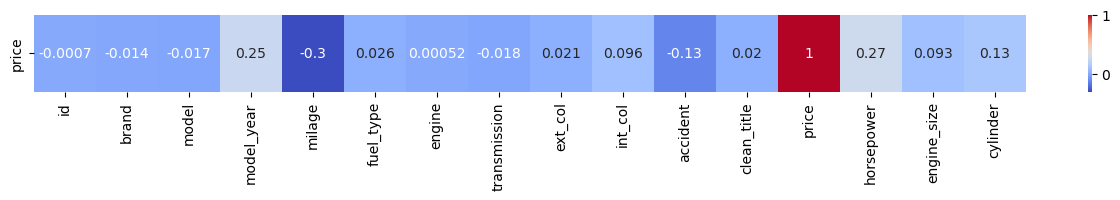

In [29]:
temp = df_train.dropna()
temp=temp.apply(lambda x : pd.factorize(x)[0] if x.dtype=='object'else x)
plt.figure(figsize=(16,1))
sns.heatmap(temp.corr()[12:13], cmap='coolwarm', annot=True)

In [30]:
df_train.drop(["id", "engine"], axis=1, inplace=True)
df_test.drop(["id", "engine"], axis=1, inplace=True)

In [31]:
df_train.isna().sum()

brand               0
model               0
model_year          0
milage              0
fuel_type         636
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title         0
price               0
horsepower      33259
engine_size     14214
cylinder        37855
dtype: int64

In [32]:
cat_feats = ['brand',  'fuel_type',  'ext_col', 'int_col', 'model', 'transmission']
def cleaning(df, cat_feats, threshold=101):
    for i in cat_feats:
        if df[i].dtype.name == 'category':
            if 'missing' not in df[i].cat.categories:
                df[i] = df[i].cat.add_categories('missing')
            if 'noise' not in df[i].cat.categories:
                df[i] = df[i].cat.add_categories('noise')
        else:
            df[i] = df[i].astype('category')
            df[i] = df[i].cat.add_categories(['missing', 'noise'])
        
        df[i] = df[i].fillna('missing')
        
        count = df[i].value_counts(dropna=False)
        less_freq = count[count < threshold].index
        
        df[i] = df[i].apply(lambda x: 'noise' if x in less_freq else x)
    
    return df
df_train = cleaning(df_train, cat_feats)
df_test = cleaning(df_test, cat_feats) 

In [33]:
df_train.isna().sum()

brand               0
model               0
model_year          0
milage              0
fuel_type           0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title         0
price               0
horsepower      33259
engine_size     14214
cylinder        37855
dtype: int64

In [34]:
df_test.isna().sum()

brand               0
model               0
model_year          0
milage              0
fuel_type           0
transmission        0
ext_col             0
int_col             0
accident         1632
clean_title         0
horsepower      22181
engine_size      9407
cylinder        25150
dtype: int64

In [35]:
le = LabelEncoder()
for label, content in df_train.items():
    if df_train[label].dtype == "O":
        df_train[label] = le.fit_transform(df_train[label])
for label, content in df_test.items():
    if df_test[label].dtype == "O":
        df_test[label] = le.fit_transform(df_test[label])

### EDA

<Axes: xlabel='price', ylabel='Density'>

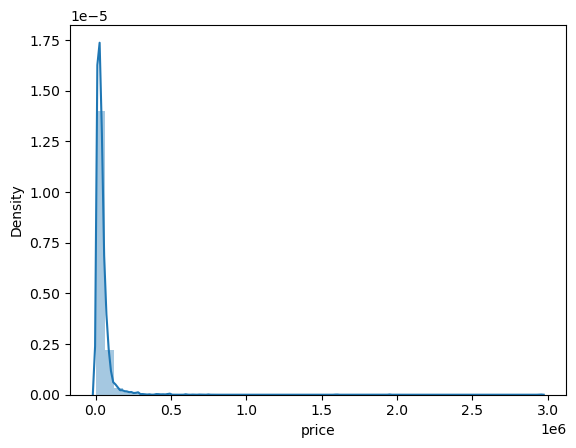

In [36]:
sns.distplot(df_train["price"])

<Axes: xlabel='price', ylabel='Density'>

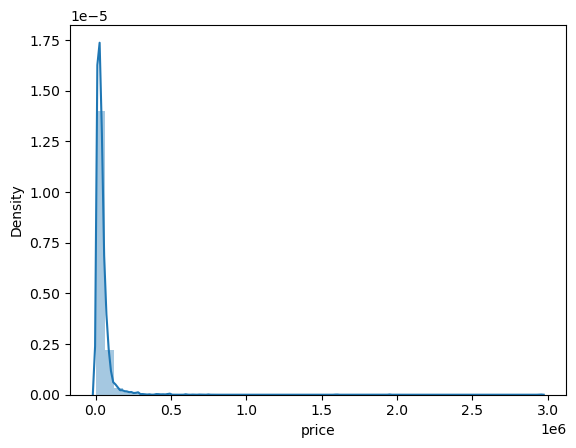

In [37]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution='normal')
temp = df_train.copy()
qt.fit_transform(temp)
sns.distplot(temp.price)

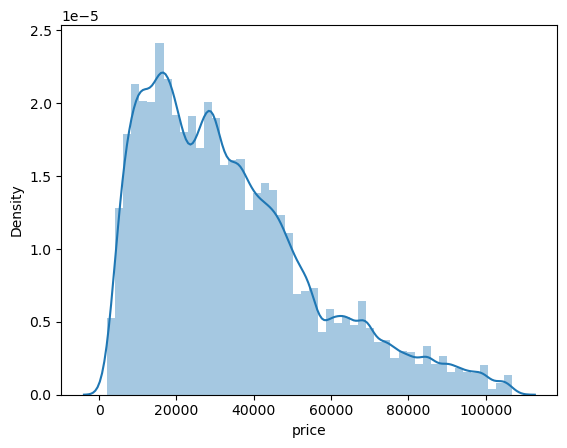

In [38]:
q = df_train["price"].quantile(q=0.95)
df_train = df_train[df_train["price"]<q]
sns.distplot(df_train.price);

In [39]:
df_train.describe()

,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,horsepower,engine_size,cylinder
count,179040.000000,179040.000000,179040.000000,179040.000000,179040.000000,179040.000000,179040.000000,179040.000000,176773.000000,179040.000000,179040.000000,149034.000000,165794.000000,144762.000000
mean,19.388801,295.139958,2015.627329,68145.847151,2.925855,17.541069,6.385863,2.699235,0.232524,0.107255,33941.865421,338.302052,3.783941,6.342327
std,12.515726,157.207362,5.661283,49591.629242,0.713974,8.073511,4.710004,3.651579,0.422443,0.309438,22174.236716,111.790797,1.357122,1.542842
min,0.000000,0.000000,1974.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2000.000000,70.000000,0.650000,3.000000
25%,8.000000,163.000000,2013.000000,26500.000000,3.000000,11.000000,1.000000,1.000000,0.000000,0.000000,16500.000000,260.000000,3.000000,6.000000
50%,18.000000,304.000000,2017.000000,60000.000000,3.000000,19.000000,5.000000,1.000000,0.000000,0.000000,29500.000000,324.000000,3.500000,6.000000
75%,30.000000,475.000000,2020.000000,97615.000000,3.000000,23.000000,12.000000,3.000000,0.000000,0.000000,45999.000000,405.000000,4.700000,8.000000
max,45.000000,475.000000,2024.000000,405000.000000,8.000000,30.000000,14.000000,14.000000,1.000000,1.000000,106798.000000,1020.000000,8.400000,12.000000


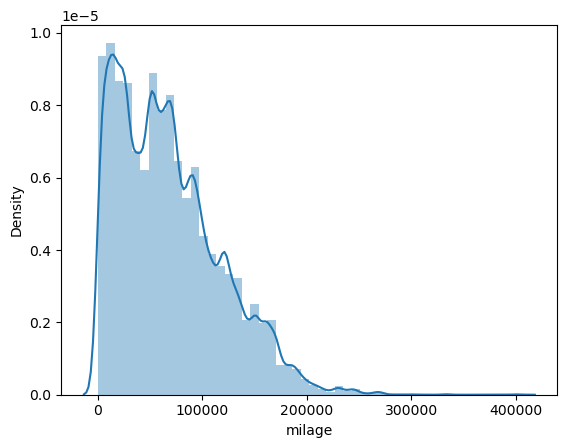

In [40]:
sns.distplot(df_train.milage);

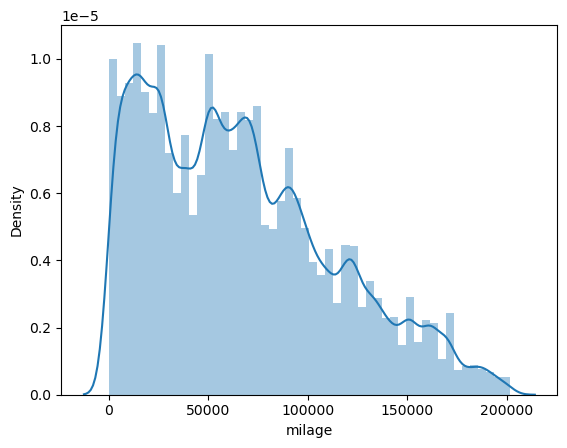

In [41]:
q = df_train["milage"].quantile(q=0.99)
df_train = df_train[df_train["milage"]<q]
sns.distplot(df_train.milage);

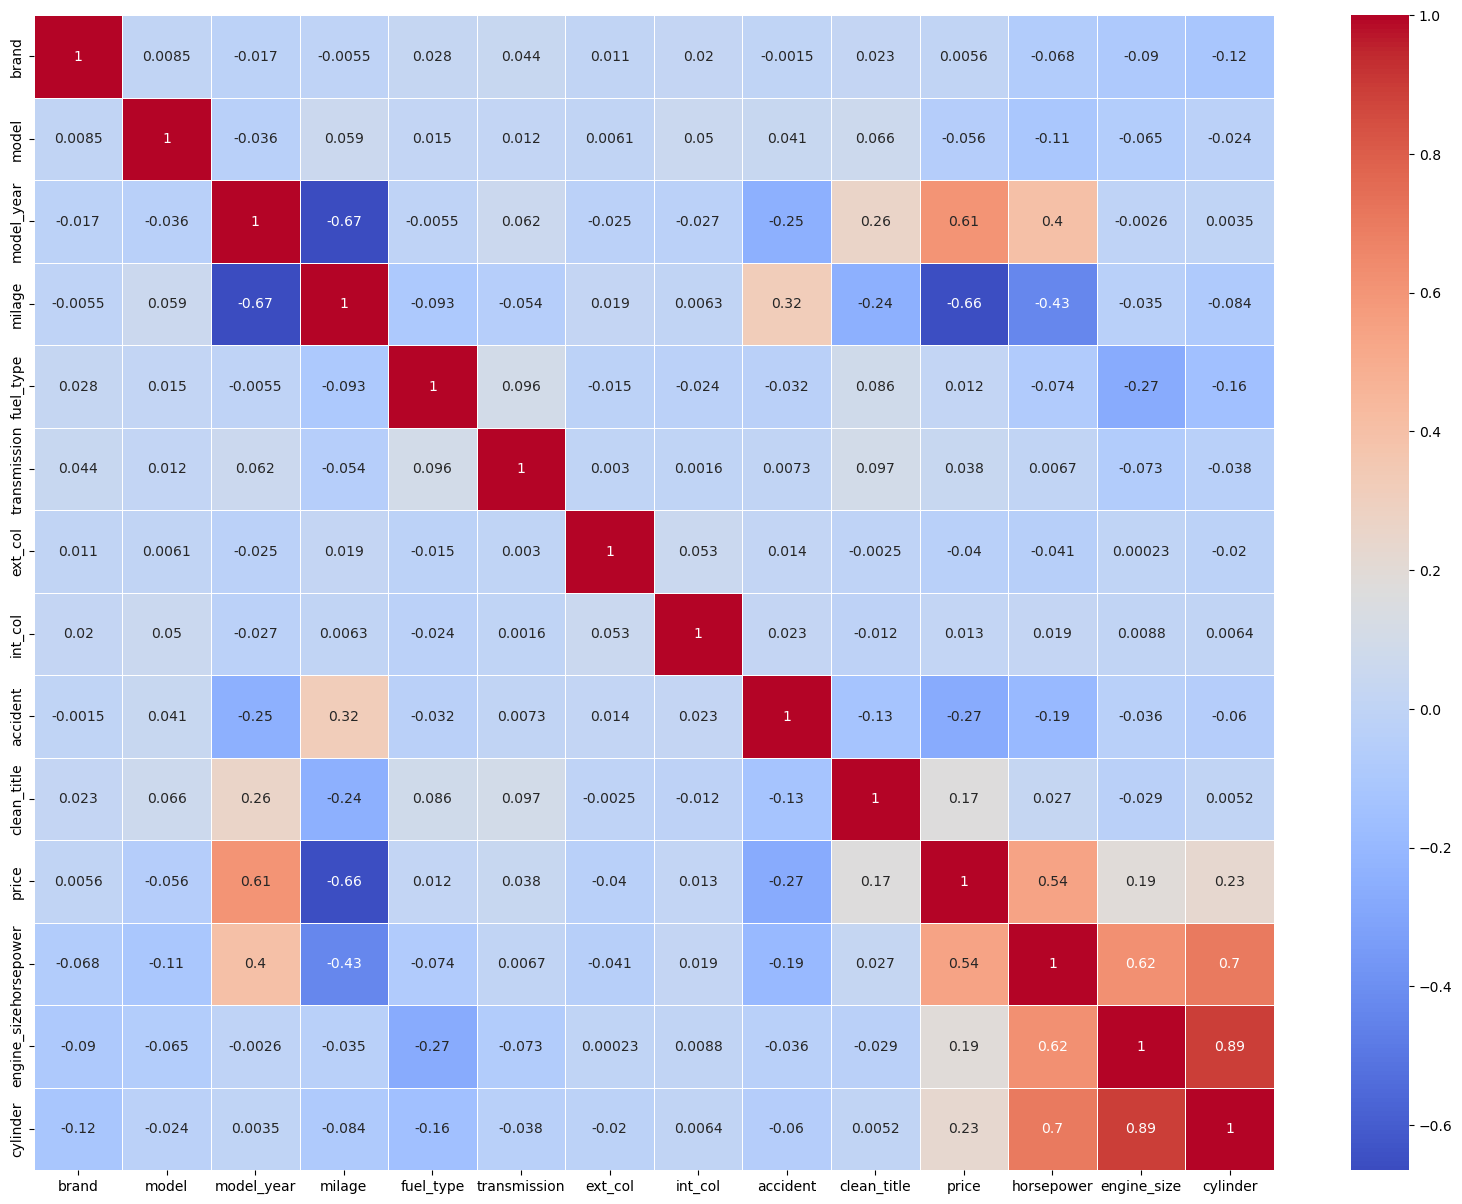

In [42]:
plt.figure(figsize=(20, 15))
correlation_matrix = df_train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

<Axes: xlabel='horsepower', ylabel='Density'>

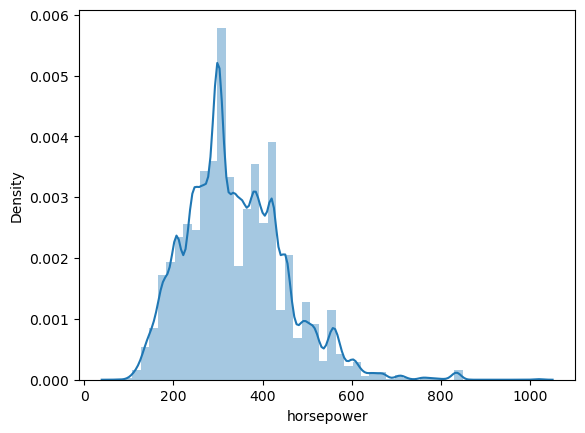

In [43]:
sns.distplot(df_train.horsepower)

<Axes: xlabel='engine_size', ylabel='Density'>

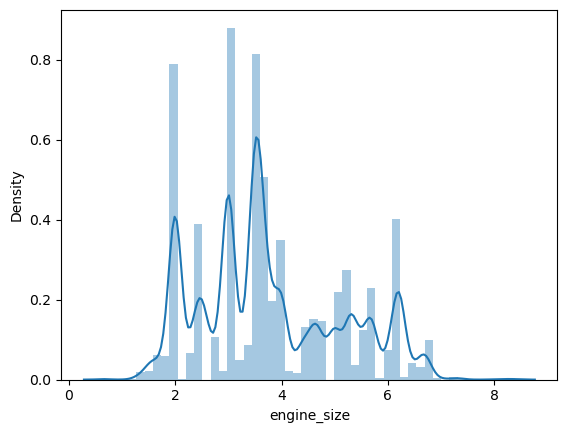

In [44]:
sns.distplot(df_train.engine_size)

<Axes: xlabel='cylinder', ylabel='Density'>

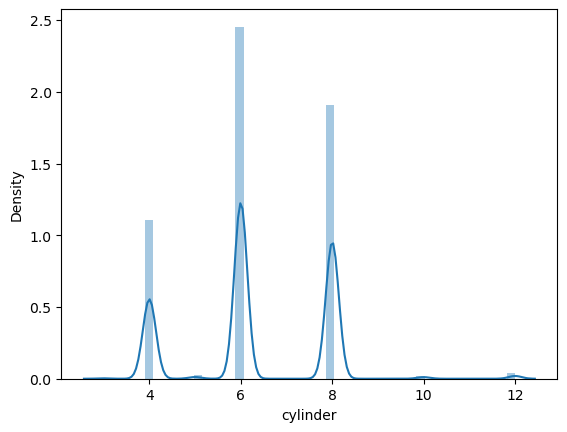

In [45]:
sns.distplot(df_train.cylinder)

In [46]:
def fill_num(df):
    df.cylinder.fillna(6, inplace=True)
    df.engine_size.fillna(3, inplace=True)
    df.horsepower.fillna(250, inplace=True)
    df.accident.fillna(0, inplace=True)
fill_num(df_train)
fill_num(df_test)

In [47]:
df_train.isna().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
horsepower      0
engine_size     0
cylinder        0
dtype: int64

In [48]:
df_test.isna().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
horsepower      0
engine_size     0
cylinder        0
dtype: int64

## 5. Modelling

In [49]:
X = df_train.drop("price", axis=1)
y = df_train.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

In [50]:
model = LinearRegression()

model.fit(X_train, y_train)

y_preds = model.predict(X_test)

print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_preds))}")

RMSE: 15112.35595485433


### RandomForestRegressor

In [51]:
model = RandomForestRegressor()

model.fit(X_train, y_train)

y_preds = model.predict(X_test)

print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_preds))}")

RMSE: 14072.973782793895


### XGBOOST

In [52]:
model = XGBRegressor()

model.fit(X_train, y_train)

y_preds = model.predict(X_test)

print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_preds))}")

RMSE: 13589.235471439155


### CATBOOST

In [53]:
model = CatBoostRegressor()

model.fit(X_train, y_train)

y_preds = model.predict(X_test)

print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_preds))}")

Learning rate set to 0.089564
0:	learn: 21076.7651885	total: 148ms	remaining: 2m 28s
1:	learn: 20154.5416920	total: 156ms	remaining: 1m 17s
2:	learn: 19353.0353927	total: 164ms	remaining: 54.6s
3:	learn: 18642.4166710	total: 172ms	remaining: 42.9s
4:	learn: 18014.9045850	total: 181ms	remaining: 35.9s
5:	learn: 17474.1449770	total: 188ms	remaining: 31.2s
6:	learn: 16997.8423341	total: 195ms	remaining: 27.7s
7:	learn: 16592.6161414	total: 203ms	remaining: 25.1s
8:	learn: 16243.8127263	total: 210ms	remaining: 23.1s
9:	learn: 15938.1133466	total: 216ms	remaining: 21.4s
10:	learn: 15669.1911259	total: 223ms	remaining: 20.1s
11:	learn: 15440.2434254	total: 230ms	remaining: 18.9s
12:	learn: 15243.9444415	total: 238ms	remaining: 18.1s
13:	learn: 15073.4994859	total: 245ms	remaining: 17.3s
14:	learn: 14931.9691432	total: 252ms	remaining: 16.6s
15:	learn: 14806.4538493	total: 260ms	remaining: 16s
16:	learn: 14690.1415811	total: 267ms	remaining: 15.4s
17:	learn: 14597.1162824	total: 274ms	remaini

### LightGBM

In [54]:
model = LGBMRegressor()

model.fit(X_train, y_train)

y_preds = model.predict(X_test)

print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_preds))}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 941
[LightGBM] [Info] Number of data points in the train set: 141776, number of used features: 13
[LightGBM] [Info] Start training from score 34146.384028
RMSE: 13584.037071387489


### Exporting submission

In [55]:
model = CatBoostRegressor()

model.fit(X_train, y_train)

y_preds = model.predict(df_test)

Learning rate set to 0.089564
0:	learn: 21076.7651885	total: 9.56ms	remaining: 9.55s
1:	learn: 20154.5416920	total: 19ms	remaining: 9.46s
2:	learn: 19353.0353927	total: 27.5ms	remaining: 9.15s
3:	learn: 18642.4166710	total: 36.5ms	remaining: 9.09s
4:	learn: 18014.9045850	total: 45.2ms	remaining: 8.99s
5:	learn: 17474.1449770	total: 53.8ms	remaining: 8.92s
6:	learn: 16997.8423341	total: 61.8ms	remaining: 8.77s
7:	learn: 16592.6161414	total: 69ms	remaining: 8.56s
8:	learn: 16243.8127263	total: 76.3ms	remaining: 8.4s
9:	learn: 15938.1133466	total: 83.3ms	remaining: 8.25s
10:	learn: 15669.1911259	total: 90.5ms	remaining: 8.13s
11:	learn: 15440.2434254	total: 97.5ms	remaining: 8.03s
12:	learn: 15243.9444415	total: 104ms	remaining: 7.89s
13:	learn: 15073.4994859	total: 111ms	remaining: 7.8s
14:	learn: 14931.9691432	total: 119ms	remaining: 7.79s
15:	learn: 14806.4538493	total: 127ms	remaining: 7.8s
16:	learn: 14690.1415811	total: 134ms	remaining: 7.73s
17:	learn: 14597.1162824	total: 140ms	re

In [56]:
df_sub = pd.read_csv("data/sample_submission.csv")
df_sub.price = y_preds
df_sub.to_csv('submission.csv', index=False)

In [57]:
%pip install optuna

In [58]:
import optuna

def objective(trial):
    params = {
        "iterations": 1000,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }

    model = CatBoostRegressor(**params, silent=True)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    return rmse

In [59]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

[I 2024-09-14 16:26:35,988] A new study created in memory with name: no-name-3c0a3b18-5458-4126-b429-047233e1b885
[I 2024-09-14 16:26:47,601] Trial 0 finished with value: 13592.937209667793 and parameters: {'learning_rate': 0.01580112603066199, 'depth': 8, 'subsample': 0.7113334934052832, 'colsample_bylevel': 0.8266635143873964, 'min_data_in_leaf': 63}. Best is trial 0 with value: 13592.937209667793.
[I 2024-09-14 16:27:12,401] Trial 1 finished with value: 13768.826604445276 and parameters: {'learning_rate': 0.004521450118128974, 'depth': 10, 'subsample': 0.9094467870770572, 'colsample_bylevel': 0.3131847296866041, 'min_data_in_leaf': 12}. Best is trial 0 with value: 13592.937209667793.
[I 2024-09-14 16:27:21,397] Trial 2 finished with value: 13575.903978645898 and parameters: {'learning_rate': 0.09280430052196681, 'depth': 8, 'subsample': 0.1535594699249202, 'colsample_bylevel': 0.7247590218365451, 'min_data_in_leaf': 33}. Best is trial 2 with value: 13575.903978645898.
[I 2024-09-14 

In [60]:
print('Best RMSE:', study.best_value)

Best RMSE: 13524.728835650862
